In [1]:
import os
import time
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from sklearn.cluster import DBSCAN
from matplotlib.colors import Colormap

In [2]:
# Load from HDF5 file

project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')

with pd.HDFStore(os.path.join(datadir, 'tweets_1M.h5')) as store:
    subset = store.tweets_subset

In [3]:
# Convert the lat and lng columns to numpy array
data = subset.as_matrix(columns=['lat', 'lng'])

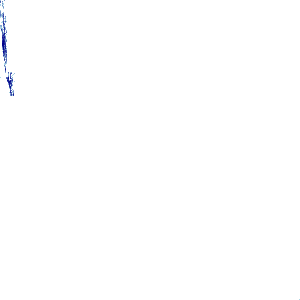

In [8]:
# Visualize points with datashader

cvs = ds.Canvas(plot_width=300, plot_height=300)
agg = cvs.points(subset, 'lng', 'lat')
tf.shade(agg)

In [9]:
# Prepare the DBSCAN model object

from __future__ import division

miles = .75

# Rough approximation: 100 km / 1 degree lat or long
kilometers = miles / 0.621371
degrees = kilometers / 100

db = DBSCAN(eps=degrees,
            min_samples=100)

In [11]:
# Start timer
t0 = time.time()

# Fit the data and save timing
db.fit(data)
db_time = time.time() - t0
print (str(db_time) + ' seconds')

# Add fitted label back into DataFrame
subset['cluster'] = db.labels_

# Find number of clusters created
clusters = subset.cluster.unique()
print('{} unique clusters created'.format(str(len(clusters))))

6.094548940658569 seconds
75 unique clusters created


In [12]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73], dtype=int32)

In [14]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(subset, 'lng', 'lat', ds.mean('cluster'))
tf.shade(agg, cmap=Colormap('Accent', 80))

NotImplementedError: Abstract class only

In [15]:
colors = Colormap('Accent', 80)
colors

In [16]:
subset.head()

,id,lat,lng,text,timeStamp,user_id,cluster
829042,384893696002375681,37.558208,-122.281324,feel bad for everyteam in the afc east but the...,2013-10-01 04:13:02,68357334,0
553002,382687061678891009,37.475344,-122.164632,@_iFound2Pac_ haha fasho Ima add you when I ge...,2013-09-25 02:04:40,1033185583,9
930418,385801221539262464,35.945637,-120.871775,@jessica95085457 okey alo mejor te pudiera dar...,2013-10-03 16:19:13,410291960,-1
267299,380376003781988353,37.588906,-122.482602,"I seriously just like, improved my dance chore...",2013-09-18 17:01:21,550685053,1
624722,383284680440561666,37.478333,-122.220401,"U betta calm down homie, over here walkin arou...",2013-09-26 17:39:23,382487828,2


In [17]:
subset.cluster.value_counts()

 0     23370
-1     22825
 4     13932
 8     11441
 3      3675
 5      2833
 9      1358
 13     1216
 22     1166
 17     1108
 29      945
 7       845
 23      833
 12      600
 55      565
 10      513
 2       498
 24      465
 46      454
 18      439
 43      432
 48      367
 27      361
 14      359
 15      341
 34      341
 1       323
 42      319
 21      313
 39      306
       ...  
 11      195
 63      174
 41      171
 61      170
 53      148
 47      148
 70      142
 50      141
 37      138
 28      138
 6       135
 68      132
 64      132
 31      132
 65      127
 62      126
 32      125
 66      124
 35      120
 60      117
 67      114
 33      112
 57      112
 40      106
 26      105
 71      105
 58      102
 72       95
 69       83
 73       52
Name: cluster, Length: 75, dtype: int64